優化網路查詢結果

爬蟲 聲量分析

In [35]:
import requests
from bs4 import BeautifulSoup

In [37]:
url = 'https://www.ptt.cc/bbs/NBA/index.html' 
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')
data = soup.select('a')

In [56]:
title = []
url = 'https://www.ptt.cc/bbs/NBA/index.html'     #起始網址

for page in range(1,10):
    res = requests.get(url)
    soup = BeautifulSoup(res.text,'html.parser')
    data = soup.select('a')
    paging = soup.select('.btn-group.btn-group-paging a')
    last_url = paging[1]['href']
    url = 'https://www.ptt.cc/' + last_url 
    print('Page'+str(page))
    
    for item in data:
        title.append(item.text)
#     print(title)

Page1
['批踢踢實業坊', '看板 NBA', '關於我們', '聯絡資訊', '看板', '精華區', '最舊', '‹ 上頁', '下頁 ›', '最新', '[BOX ] Wizards 116:107 Celtics 數據', '搜尋同標題文章', '搜尋看板內 Rambo 的文章', '[BOX ] Pacers 100:118 Raptors 數據', '搜尋同標題文章', '搜尋看板內 Rambo 的文章', '[BOX ] Hawks 102:99 Pelicans 數據', '搜尋同標題文章', '搜尋看板內 Rambo 的文章', '[BOX ] Timberwolves 113:108 Bucks 數據', '搜尋同標題文章', '搜尋看板內 Rambo 的文章', '[BOX ] Lakers 115:123 Thunder 數據', '搜尋同標題文章', '搜尋看板內 Rambo 的文章', '[情報] 失誤大四喜排行榜 - Westbrook居冠', '搜尋同標題文章', '搜尋看板內 VeryGoodBoy 的文章', '[情報] 湖人過去25年來第一次敗掉25分領先', '搜尋同標題文章', '搜尋看板內 avrild12 的文章', '[情報] 湖人龜首次大三元', '搜尋同標題文章', '搜尋看板內 henry87927 的文章', '[討論] 今日Russell Westbrook', '搜尋同標題文章', '搜尋看板內 hanson90244 的文章', '[花邊] KD：我們想念Kyrie', '搜尋同標題文章', '搜尋看板內 Wojnarowski 的文章', '[討論] 湖人少了什麼贏球關鍵因素呢？', '搜尋同標題文章', '搜尋看板內 peterlin057 的文章', '[討論] 今天雷霆贏球的關鍵是什麼', '搜尋同標題文章', '搜尋看板內 star880613 的文章', '[花邊] 雷霆教練：最後灌籃責任在我', '搜尋同標題文章', '搜尋看板內 mingonly 的文章', '[討論] 鬍子是不是被罰球制度養出來的75球星?', '搜尋同標題文章', '搜尋看板內 marcus40 的文章', '[公告] 板規v8.7', '搜尋同標題文章', '搜尋看板內 Induction 的文章', '[

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #提供字型避免圖軸標題中文產生亂碼

colrogroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
#藍色漸層
colrogroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b','#ffb4b4']
#紅色漸層

#決定所欲查詢比對之聲量標的
shoes_brand = ['warriors','nets','lakers','clippers','rockets','timberwolves',
         'nuggets','heat', 'raptors', 'celetics']

#轉成大寫
shoes_brand_upper = []
for i in shoes_brand:
    shoes_brand_upper.append(i.upper())

#轉成第一個字母大寫
shoes_brand_first_upper = []
for x in shoes_brand:
    shoes_brand_first_upper.append(x.capitalize())


brand_count_lower = []
for name in shoes_brand:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_lower.append(count)

brand_count_upper = []
for name in shoes_brand_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_upper.append(count)

    
brand_count_first_upper = []
for name in shoes_brand_first_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_first_upper.append(count)

    
print("lower:", brand_count_lower)
print("upper:", brand_count_upper)
print("first:", brand_count_first_upper)

total = []

for each_data in range(0, len(brand_count_lower)):
    total.append(brand_count_lower[each_data]+brand_count_upper[each_data]+brand_count_first_upper[each_data])

print("Total:", total)

lower: [0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
upper: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
first: [2, 3, 3, 1, 2, 2, 2, 2, 2, 0]
Total: [2, 6, 3, 1, 2, 2, 2, 2, 2, 0]


In [58]:
res        #確認完 才能接續做

<Response [200]>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #提供字型避免圖軸標題中文產生亂碼

colrogroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
#藍色漸層
colrogroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b','#ffb4b4']
#紅色漸層

#決定所欲查詢比對之聲量標的
shoes_brand = ['warriors','nets','lakers','clippers','rockets','timberwolves',
         'nuggets','heat', 'raptors', 'celetics']

#轉成大寫
shoes_brand_upper = []
for i in shoes_brand:
    shoes_brand_upper.append(i.upper())

#轉成第一個字母大寫
shoes_brand_first_upper = []
for x in shoes_brand:
    shoes_brand_first_upper.append(x.capitalize())


brand_count_lower = []
for name in shoes_brand:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_lower.append(count)

brand_count_upper = []
for name in shoes_brand_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_upper.append(count)

    
brand_count_first_upper = []
for name in shoes_brand_first_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_first_upper.append(count)

    
print("lower:", brand_count_lower)
print("upper:", brand_count_upper)
print("first:", brand_count_first_upper)

total = []

for each_data in range(0, len(brand_count_lower)):
    total.append(brand_count_lower[each_data]+brand_count_upper[each_data]+brand_count_first_upper[each_data])

print("Total:", total)

lower: [0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
upper: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
first: [2, 3, 3, 1, 2, 2, 2, 2, 2, 0]
Total: [2, 6, 3, 1, 2, 2, 2, 2, 2, 0]


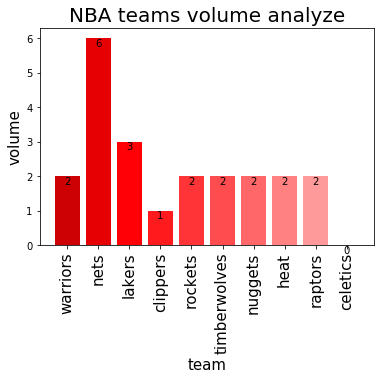

In [60]:
plt.bar(shoes_brand, total, color=colrogroup2) 
plt.xticks(fontsize=15,rotation=90)

for index, data in enumerate(total):      #enumerate加入位置資料 >>> (index,value)
    plt.text(x=index, y =data, s=data, verticalalignment="top", horizontalalignment="center")
    
plt.xlabel('team', fontsize=15)
plt.ylabel('volume', fontsize=15)
plt.title('NBA teams volume analyze', fontsize=20)
plt.show()  #不是每個平台都能直接顯示 所以不能省略

enumerate 使用方式

In [27]:
# LL =[]
# L = ['a','b','c']
# for i in enumerate(L):
#     LL.append(i)